# Stochastic Modeling

In [ ]:
import os
import math
import pandas as pd
import numpy as np
import random
import decimal
import scipy.linalg
from scipy.stats import norm
import numpy.random as nrand
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
df = pd.read_csv("MSFT.csv",index_col="Date", parse_dates=True)
spy = pd.DataFrame({'MSFT':df['Adj Close']})

start_date = "2023-05-13"
end_date = "2024-05-13"
dates = pd.date_range(start_date,end_date)

prices = pd.DataFrame(index=dates)
prices = prices.join(spy, how='inner')

returns = np.log(prices / prices.shift(1)).iloc[1:]

Text(0, 0.5, 'returns')

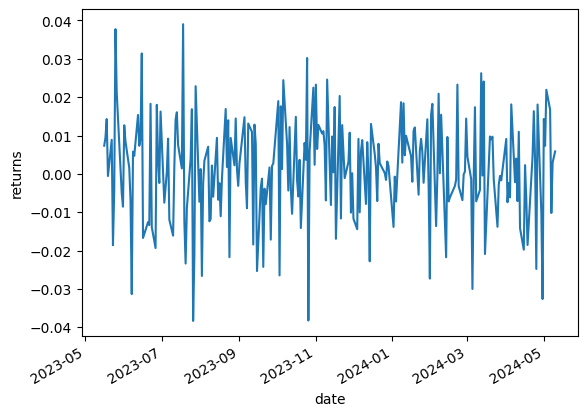

In [12]:
returns['MSFT'].plot()
plt.xlabel('date')
plt.ylabel('returns')

Text(0, 0.5, 'volatility')

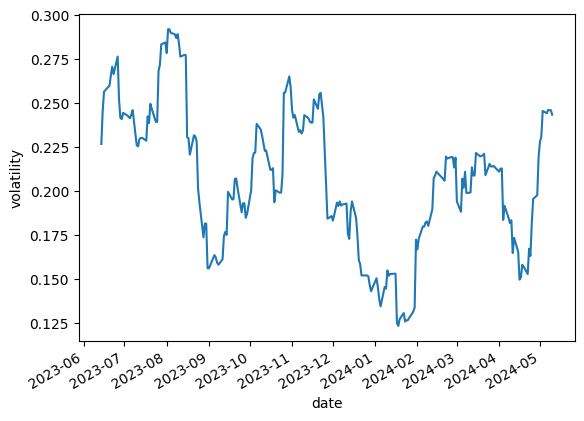

In [13]:
rolling_window =21
volatility = returns['MSFT'].rolling(window =rolling_window ).std()*np.sqrt(252)
volatility.plot()
plt.xlabel('date')
plt.ylabel('volatility')

In [14]:

simulations = 2500 # number of simulations
m_periods=21 # number of periods for each simulation
log_returns = returns['MSFT']
last_value = prices.iloc[-1]
time_deviation = math.sqrt(1/252) * log_returns.std() #

# Geometric Brownian Motion
mu = log_returns.mean() # average of log returns
var = log_returns.var() # variance of log returns
sigma = log_returns.std() # standard deviation/ volatility of log returns

random_seed = 7

# Geometric Brownian Motion

<ipython-input-16-876b98afbf0c>:54: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  plt.axvline(x=float(last_value), color='w', linestyle='dashed',linewidth=2, label = 'Mean: ' + str(round(float(last_value),3)))
<ipython-input-16-876b98afbf0c>:61: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  plt.axhline(y=float(last_value), color='k', linestyle='dashed',linewidth=2,label = 'Current Value: ' + str(round(float(last_value),3)))


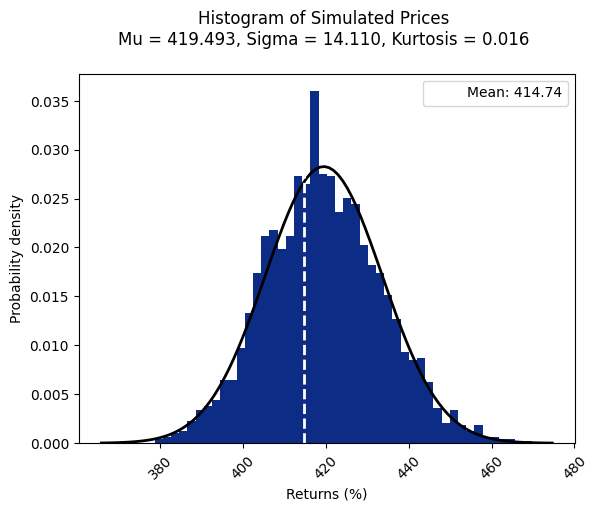

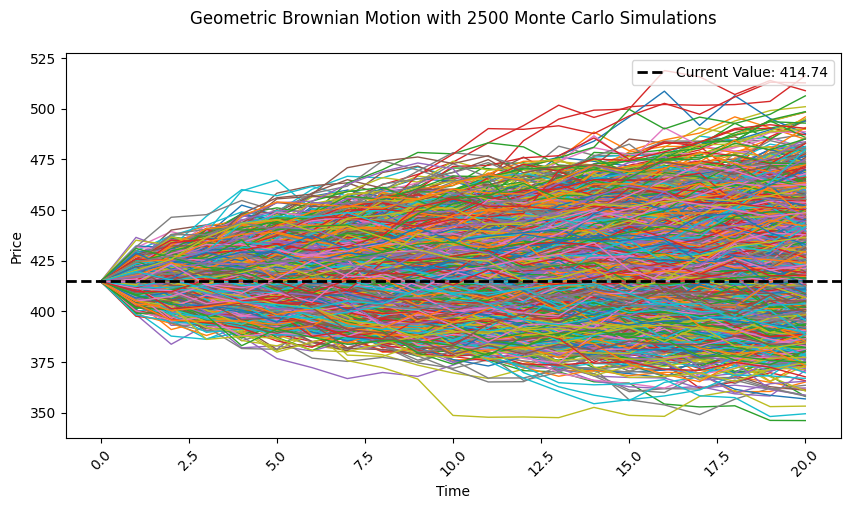

In [16]:
def Geometric_Brownian_Motion(seed=random_seed,periods=m_periods,annualsimulations=simulations,plot=True):

    np.random.seed(seed)

    # Geometric Brownian motion
    drift = mu - (0.5*var)

    z = np.random.normal(loc=0, size=(periods,simulations))

    geom =  drift + sigma * z

    # Convert to daily returns
    daily_returns = np.exp(geom)

    # Convert to prices
    price_list = np.zeros_like(daily_returns)

    price_list[0] = last_value

    for i in range(1, periods):
        price_list[i] = price_list[i - 1] * daily_returns[i-1]

    # Storing simulations into future dates
    forward_time = pd.DataFrame(log_returns.index[:periods], columns=['Date'])
    forward_time['Date'] = forward_time + pd.DateOffset(years=1)
    try:
        price_simulations = pd.DataFrame(price_list,index=forward_time)
    except ValueError:
        price_simulations = pd.DataFrame(price_list)
    price_simulations_t = pd.DataFrame(price_list)

    # Graphing histogram of simulated prices
    price_array = price_simulations.mean().sort_values(ascending=True)

    mu_hist = price_array.mean()
    sigma_hist = price_array.std()
    kurtosis = price_array.kurtosis()
    skewness = price_array.skew()
    num_bins = int(np.sqrt(simulations))

    fig, ax = plt.subplots()
    n, bins, patches = ax.hist(price_array, num_bins, density=1,color="#002080",label='',alpha=0.95)

    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu_hist, sigma_hist)
    plt.plot(x, p, 'k', linewidth=2)

    plt.xlabel('Returns (%)')
    plt.xticks(rotation=45)
    plt.yticks()
    plt.ylabel('Probability density')
    ax.set_title("Histogram of Simulated Prices \nMu = %.3f, Sigma = %.3f, Kurtosis = %.3f \n" % (mu_hist,sigma_hist,kurtosis), fontsize=12)
    plt.axvline(x=float(last_value), color='w', linestyle='dashed',linewidth=2, label = 'Mean: ' + str(round(float(last_value),3)))
    ax.set_facecolor('w')
    plt.legend(loc="upper right")

    # Graphing simulations in sequence
    plt.figure(figsize=(10,5))
    plt.plot(price_simulations_t,linestyle='-',linewidth=1)
    plt.axhline(y=float(last_value), color='k', linestyle='dashed',linewidth=2,label = 'Current Value: ' + str(round(float(last_value),3)))

    title = "Geometric Brownian Motion with " + str(simulations) + " Monte Carlo Simulations\n"
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.xticks(rotation=45)
    plt.legend(loc="upper right")



Geometric_Brownian_Motion()
